<a href="https://colab.research.google.com/github/Suyashsudhir2695/ML_and_tensorflow/blob/master/Pathlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Model training and Prediction**


1.   Get the data and store it in **data_root_orig** and get the path of the directories
2.   For each category in **CATAGORIES** get the path of data
3.   Read the path of the image and turn it to GRAYSCALE and keep appending resized image array
4.   Save the labels and features(such as pixels, etc. ) in a file for later use



  7%|▋         | 55/799 [00:00<00:01, 548.33it/s]

/root/.keras/datasets/flower_photos


100%|██████████| 898/898 [00:01<00:00, 717.10it/s]


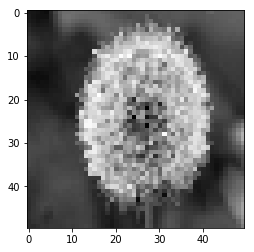

3670


In [0]:
import tensorflow as tf
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tqdm import tqdm as tq
import pickle
import random
import pathlib



data_root_orig = tf.keras.utils.get_file('flower_photos',
                                         'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
                                         untar=True)
data_root = pathlib.Path(data_root_orig)
print(data_root)
os.listdir(data_root)

CATAGORIES = ['tulips', 'roses', 'sunflowers', 'daisy',  'dandelion']
X = []
y = []

training_data = []
IMG_SIZE = 50
def create_training_data():
    global img_arr
    global new_img_arr
    for cat in CATAGORIES:
        path = os.path.join(data_root, cat)
        class_num = CATAGORIES.index(cat)

        for img in tq(os.listdir(path)):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_img_arr,class_num])
            except Exception as e:
                pass
            # plt.imshow(img_arr,cmap="gray")
            # plt.show()


create_training_data()


for features, labels in training_data:
    X.append(features)
    y.append(labels)

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()


pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)
























1.   Load the data previously saved data in python lists
2.   Reshape **X** after converting it to numpy array and scale it in the range [0,1]
3.   initialize a model to train
and add layers to it by configuring its activation and pooling function
4. Create another layer which is densly connected to prevoius layer
5. Compile the model by configuring its optimizer , loss and metrics function

***optimizer***: This object specifies the training procedure. Pass it optimizer instances from the tf.train module, such as tf.train.AdamOptimizer, tf.train.RMSPropOptimizer, or tf.train.GradientDescentOptimizer.

***loss***: The function to minimize during optimization. Common choices include mean square error (mse), categorical_crossentropy, and binary_crossentropy. Loss functions are specified by name or by passing a callable object from the tf.keras.losses module.

***metrics***: Used to monitor training. These are string names or callables from the tf.keras.metrics module.

***epochs***: number of times the model should train



In [26]:
import numpy as np
from tensorflow.python.keras.layers import Dropout, Dense, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.models import Sequential

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X / 255.0

model = Sequential()

model.add(Conv2D(256,(3,3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(64))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(X,y, batch_size=32, epochs=3)









Epoch 1/3
3670/3670 [==============================] - 144s 39ms/sample - loss: -5401430.0065 - acc: 0.1747
Epoch 2/3
3670/3670 [==============================] - 143s 39ms/sample - loss: -283828774.7313 - acc: 0.1747
Epoch 3/3
3670/3670 [==============================] - 143s 39ms/sample - loss: -2500249463.6992 - acc: 0.1747
